In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

In [30]:
data = pd.read_csv(r"C:\Users\lahat\Documents\M2IMSD\Formation_ML_Udemy\rergression_logistique\prediction_de_fraud.csv")

In [31]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [33]:
X = data[['oldbalanceOrg', 'newbalanceOrig']].values
y = data['isFraud'].values

In [34]:
# Fractionner le jeu de données entre les ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modèle 1

In [36]:
classifier = LogisticRegression(random_state=0)

In [37]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
def affichage_region_dec(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # trace la surface de décision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')     

In [40]:
X_combine = np.vstack((X_train, X_test))
#Empilez les tableaux en séquence verticalement 
y_combine = np.hstack((y_train, y_test))
#Empilez les tableaux en séquence horizontalement 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
C:\Users\lahat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


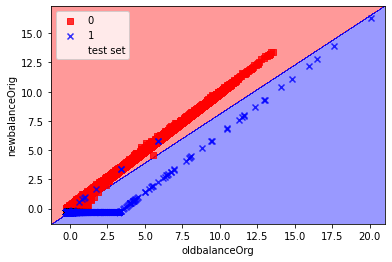

In [41]:
affichage_region_dec(X_combine,
                      y_combine, classifier=classifier,
                      test_idx=range(105,150))
   
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.legend(loc='upper left')
plt.show()

# EVALUATION DU MODELE 1

In [44]:
classifier.score(X_test, y_test)

0.998193106786826

In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[354389,     56],
       [   586,    275]], dtype=int64)

# Modèle 2

In [65]:
X_ = data[['step','type','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']].values
y_ = data['isFraud'].values

In [66]:
labEncr_X = LabelEncoder()
X_[:,1] = labEncr_X.fit_transform(X_[:,1])

In [67]:
# Fractionner le jeu de données entre les ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.25, random_state = 0)

In [68]:
# Adaptation de la régression logistique à l'ensemble de formation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
# Prédire les résultats du test
y_pred = classifier.predict(X_test)

# EVALUATION DU MODELE 2

In [71]:
classifier.score(X_test, y_test)

1.0

In [73]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[354445,      0],
       [     0,    861]], dtype=int64)